# Event Plots (inline version)

A NB template to ilustrate how to examine the features of events

In [1]:
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

2017-04-04 19:04:21


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import os
import time
import tables as tb
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from invisible_cities.database import load_db

In [5]:
import invisible_cities.core.mpl_functions as mpl
import invisible_cities.reco.tbl_functions as tbl
from invisible_cities.reco.params import S12Params, ThresholdParams
from   invisible_cities.core.system_of_units_c import units

In [6]:
from gui_functions import plot_pmt_waveforms, plot_pmt_signals_vs_time_mus, plot_signal_vs_time_mus,\
                           plot_s12

In [7]:
from event_pmaps import EventPmaps, print_s12, print_s2si

### Run Parameters

In [8]:
run_number = 3389

In [9]:
DataPMT = load_db.DataPMT(run_number)

In [10]:
RWF_file = os.path.join(os.environ['IC_DATA'],
                        'LSC/wvfms/{}/dst_waves.gdcsnext.000_{}.root.h5'.format(run_number, run_number))


In [11]:
h5rwf = tb.open_file(RWF_file,'r')

In [12]:
pmtrwf, pmtblr, sipmrwf = tbl.get_vectors(h5rwf)

In [13]:
NEVT, NPMT, PMTWL = pmtrwf.shape
NEVT, NSIPM, SIPMWL = sipmrwf.shape
print("""
        Number of events in file = {}
        Number of PMTs = {}
        PMTWL = {}
        Number of SiPMs = {}
        SiPMWL = {}
      """.format(NEVT, NPMT, PMTWL,NSIPM, SIPMWL))


        Number of events in file = 163
        Number of PMTs = 12
        PMTWL = 52000
        Number of SiPMs = 1792
        SiPMWL = 1300
      


In [14]:
s1par  = S12Params(tmin=0*units.mus, tmax=640*units.mus, lmin=5, lmax=20, stride=4, rebin=False)
s2par = S12Params(tmin=640*units.mus, tmax=800*units.mus, stride=40, lmin=80, lmax=20000, rebin=True)
thr    = ThresholdParams(thr_s1=0.5 * units.pes,  thr_s2=1 *units.pes,
                        thr_MAU = 3 * units.adc, thr_sipm = 3.5 * units.pes,
                        thr_SIPM = 30 * units.adc)

In [15]:
epm = EventPmaps(run_number,
                 s1par, s2par, thr,
                 verbose=True)

In [16]:
event=0
epm.calibrated_pmt_and_csum(event, pmtrwf)

7477.3421116275758

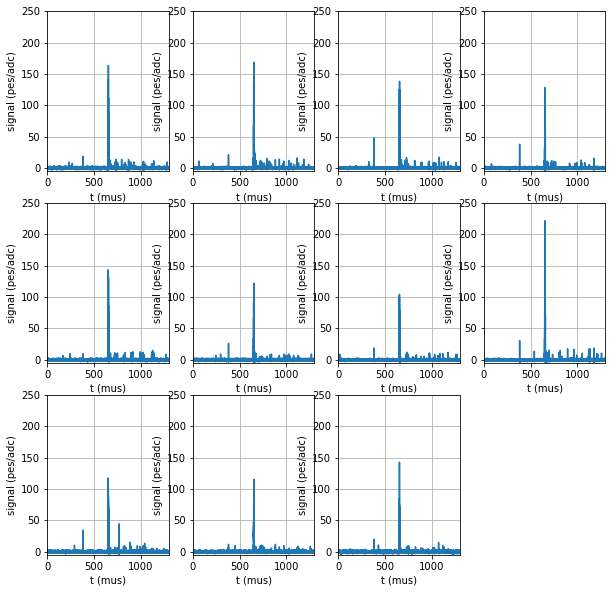

In [17]:
plot_pmt_signals_vs_time_mus(epm.CWF,
                                 epm.P.pmt_active,
                                 t_min      =    0,
                                 t_max      = 1300,
                                 signal_min =    -5,
                                 signal_max =  250)

There is a large S1 at around 400 mus. This is too large for the S2 and may be a hint of the issues we are facing.

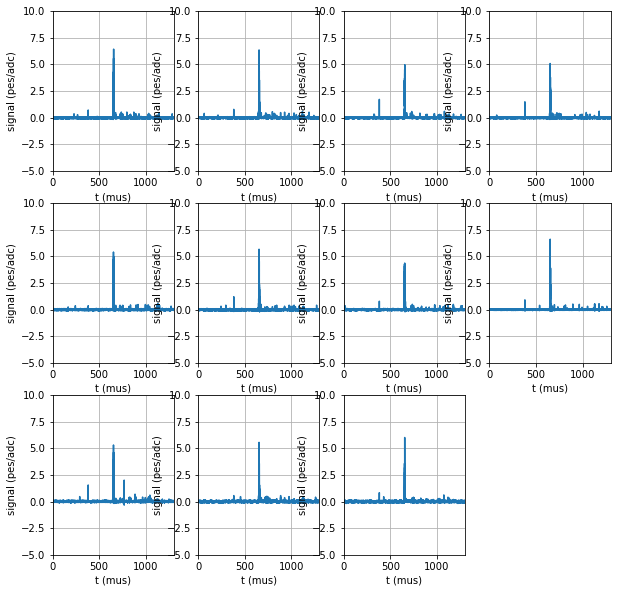

In [18]:
plot_pmt_signals_vs_time_mus(epm.CAL_PMT,
                             epm.P.pmt_active,
                             t_min      =    0,
                             t_max      = 1300,
                             signal_min =    -5,
                             signal_max =  10)

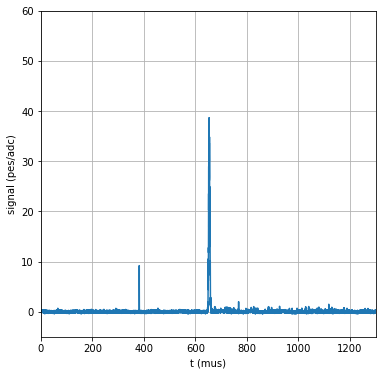

In [19]:
plot_signal_vs_time_mus(epm.csum, 
                            t_min=0, 
                            t_max=1300, 
                            signal_min=-5, 
                            signal_max=60)

The height of "S1" is totally inconsistent with S2. What we have here is an event with an S1 of unknown origin and an S2 probably without S1. 

In [20]:
epm.find_s1()

number of peaks = 1
S12 number = 0, samples = 17 sum in pes =58.61823131191956
time vector (mus) = [ 381.675  381.7    381.725  381.75   381.775  381.8    381.825  381.85
  381.875  381.9    381.925  381.95   381.975  382.     382.075  382.1
  382.125]
energy vector (pes) = [ 1.61917637  4.26629217  7.76816226  9.1865877   8.86180842  7.24039865
  5.02407006  3.78509372  2.95172416  1.79096222  1.56561245  1.40410572
  0.902514    0.53159509  0.54448564  0.67117998  0.50446272]


1

An example of non-sense S1, at 60 pes. 

In [21]:
epm.find_s2()

number of peaks = 1
S12 number = 0, samples = 12 sum in pes =7002.0556670851765
time vector (mus) = [ 648.611875    649.6875      650.6875      651.6875      652.6875
  653.6875      654.6875      655.6875      656.6875      657.6875
  658.6925      659.72142857]
energy vector (pes) = [   92.34185897   305.01491887   609.24077745   986.05036791  1146.15608197
  1197.89848084  1079.29428206   699.55456278   539.60781327   262.37786222
    76.06448758     8.45417316]


1

S2 has 7,000 pes, could be consistent with Krypton, but possibly is not (Krypton is probably around 6300 pes). 

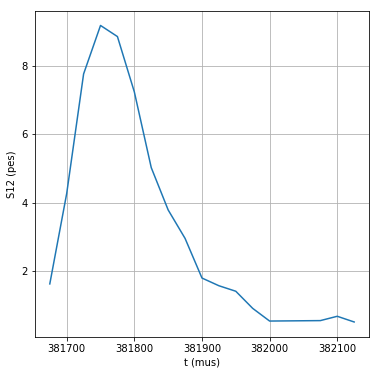

In [22]:
plot_s12(epm.S1)

In [23]:
epm.s1f

{0: S12Features(tmin=381675.0, tmax=382125.0, tpeak=381750.0, etot=58.618231311919558, epeak=9.1865877002908576, width=450.0)}

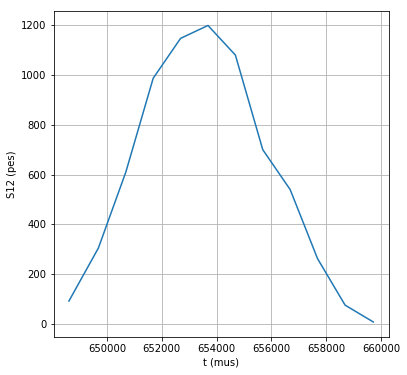

In [24]:
plot_s12(epm.S2)

In [25]:
epm.s2f

{0: S12Features(tmin=648611.875, tmax=659721.42857142852, tpeak=653687.5, etot=7002.0556670851765, epeak=1197.8984808434586, width=11109.553571428522)}

In [26]:
epm.find_ns1()

11

In [27]:
dt = epm.s2f[0].tpeak - epm.s1f[0].tpeak

In [28]:
dt/units.mus

271.9375

In [29]:
event=1
epm.calibrated_pmt_and_csum(event, pmtrwf)

4470.9728598589736

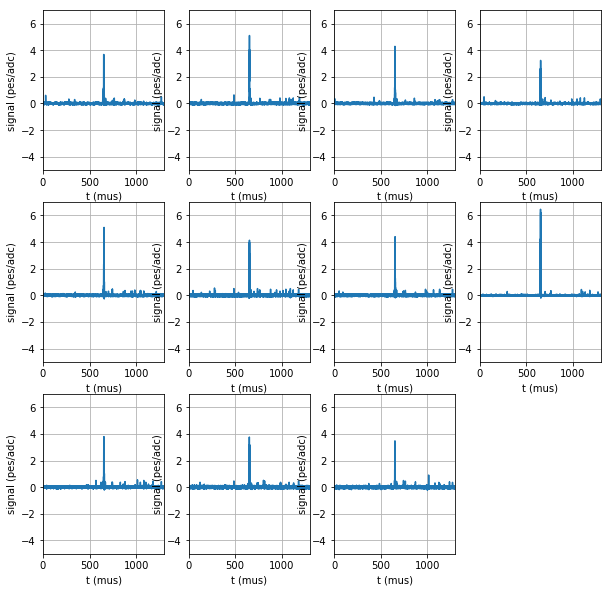

In [30]:
plot_pmt_signals_vs_time_mus(epm.CAL_PMT,
                             epm.P.pmt_active,
                             t_min      =    0,
                             t_max      = 1300,
                             signal_min =    -5,
                             signal_max =  7)

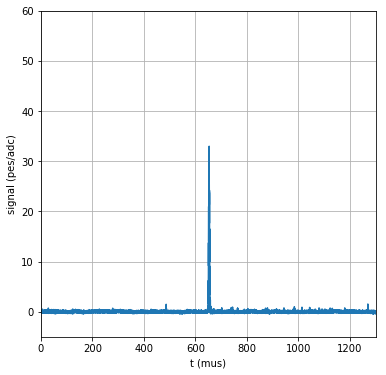

In [31]:
plot_signal_vs_time_mus(epm.csum, 
                            t_min=0, 
                            t_max=1300, 
                            signal_min=-5, 
                            signal_max=60)

In [32]:
epm.find_s1()
epm.find_s2()
epm.find_ns1()

number of peaks = 1
S12 number = 0, samples = 8 sum in pes =7.0429711491779035
time vector (mus) = [ 486.325  486.35   486.375  486.4    486.425  486.45   486.475  486.5  ]
energy vector (pes) = [ 1.00572392  1.42807619  1.39077321  0.71169641  0.55596226  0.58390724
  0.71341985  0.65341206]
number of peaks = 1
S12 number = 0, samples = 10 sum in pes =4310.023342412648
time vector (mus) = [ 648.969375  650.0125    651.0125    652.0125    653.0125    654.0125
  655.0125    656.018125  657.175     658.4     ]
energy vector (pes) = [   79.10731397   225.66393013   579.11896605   848.53140956  1040.56168527
   821.1740507    424.45342996   209.32054645    78.80667266     3.28533765]


6

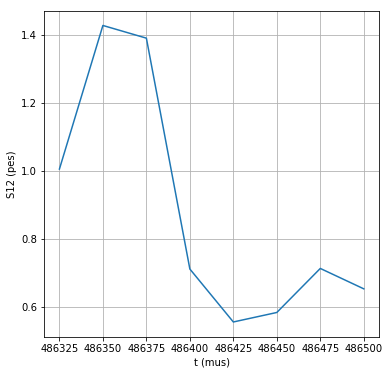

In [33]:
plot_s12(epm.S1)

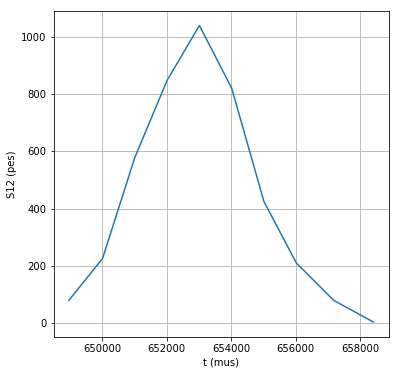

In [34]:
plot_s12(epm.S2)

In [35]:
epm.s1f

{0: S12Features(tmin=486325.0, tmax=486500.0, tpeak=486350.0, etot=7.0429711491779035, epeak=1.428076189953053, width=175.0)}

This looks like a background event in conjunction with electron rain

In [36]:
epm.s2f

{0: S12Features(tmin=648969.375, tmax=658400.0, tpeak=653012.5, etot=4310.0233424126482, epeak=1040.5616852726796, width=9430.625)}

In [37]:
event=2
epm.calibrated_pmt_and_csum(event, pmtrwf)
epm.find_s1()
epm.find_s2()
epm.find_ns1()

number of peaks = 1
S12 number = 0, samples = 10 sum in pes =10.06058866579143
time vector (mus) = [ 560.675  560.7    560.725  560.75   560.775  560.8    560.825  560.85
  560.875  560.9  ]
energy vector (pes) = [ 0.84893146  1.32635039  1.54025639  1.70296851  1.44951232  0.80352272
  0.6222865   0.62544253  0.62955583  0.51176201]
number of peaks = 1
S12 number = 0, samples = 7 sum in pes =5998.549626354456
time vector (mus) = [ 649.65125     650.6625      651.6625      652.6625      653.6625
  654.6625      655.65428571]
energy vector (pes) = [  155.58696218   567.92918747  1352.22258818  1844.07750461  1357.22038376
   585.98580281   135.52719735]


8

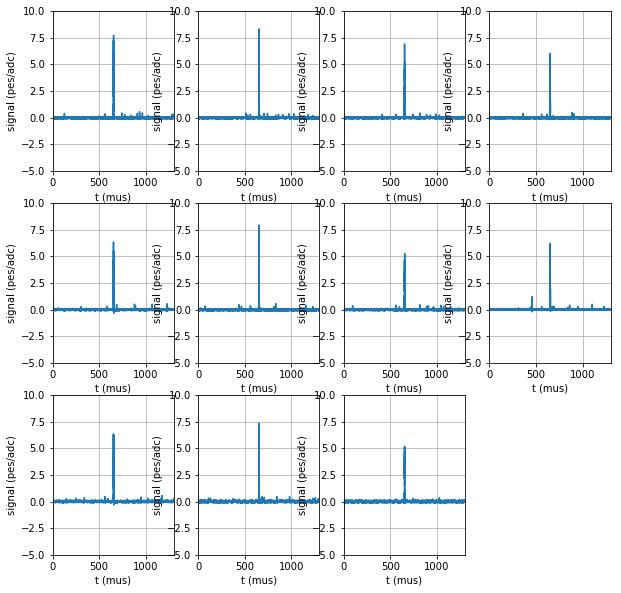

In [38]:
plot_pmt_signals_vs_time_mus(epm.CAL_PMT,
                             epm.P.pmt_active,
                             t_min      =    0,
                             t_max      = 1300,
                             signal_min =    -5,
                             signal_max =  10)

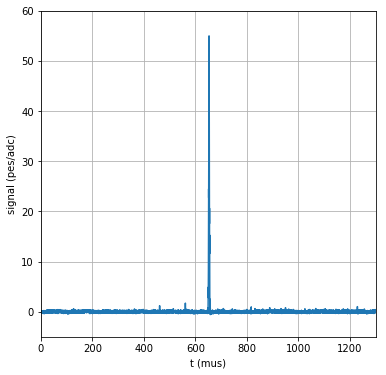

In [39]:
plot_signal_vs_time_mus(epm.csum, 
                            t_min=0, 
                            t_max=1300, 
                            signal_min=-5, 
                            signal_max=60)

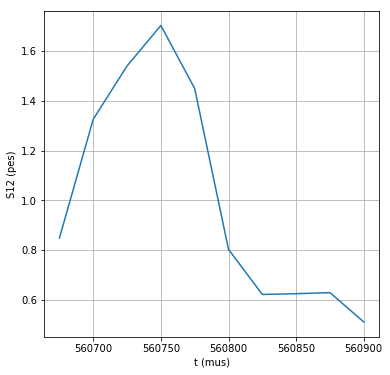

In [40]:
plot_s12(epm.S1)

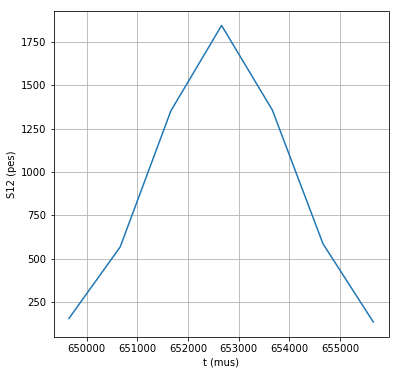

In [41]:
plot_s12(epm.S2)

In [42]:
epm.s1f

{0: S12Features(tmin=560675.0, tmax=560900.0, tpeak=560750.0, etot=10.06058866579143, epeak=1.7029685104258137, width=225.0)}

In [43]:
epm.s2f

{0: S12Features(tmin=649651.25, tmax=655654.28571428568, tpeak=652662.5, etot=5998.5496263544564, epeak=1844.0775046144352, width=6003.035714285681)}

In [44]:
def pmp(epm, event):
    epm.calibrated_pmt_and_csum(event, pmtrwf)
    
    plot_signal_vs_time_mus(epm.csum, 
                            t_min=0, 
                            t_max=1300, 
                            signal_min=-5, 
                            signal_max=60, figsize=(4,4))

    plt.show()
    print('+++S2+++++')
    epm.find_s2()
    if len(epm.S2) != 1:
        print('S2 not = 1')
        return 0
    plot_s12(epm.S2, figsize=(4,4))
    plt.show()
    print('s2f = {} '.format(epm.s2f[0]))
    
    print('+++S1+++++')
    epm.find_s1()
    if len (epm.S1) == 0:
        print('S1 == 0')
        return 0
    
    plot_s12(epm.S1, figsize=(4,4))
    
    for peak in epm.s1f:
        print('s1f = {} '.format(epm.s1f[peak]))
        dt = epm.s2f[0].tpeak - epm.s1f[peak].tpeak
        print('dt = {} mus'.format(dt/units.mus))
    

In [45]:
def pmp_plot(epmx):
    plot_pmt_signals_vs_time_mus(epmx.CAL_PMT,
                             epmx.P.pmt_active,
                             t_min      =    0,
                             t_max      = 1300,
                             signal_min =    -5,
                             signal_max =  10, figsize=(4,4))
    plt.show()
    plot_signal_vs_time_mus(epmx.csum, 
                            t_min=0, 
                            t_max=1300, 
                            signal_min=-5, 
                            signal_max=60,figsize=(4,4))
    plt.show()
    plot_s12(epmx.S1)
    plt.show(
    plot_s12(epmx.S2))
    plt.show()

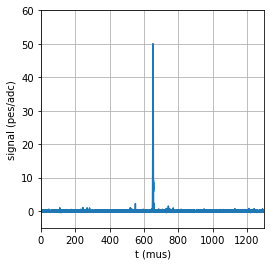

+++S2+++++
number of peaks = 1
S12 number = 0, samples = 7 sum in pes =5904.074327884989
time vector (mus) = [ 649.68125    650.6875     651.6875     652.6875     653.6875     654.6875
  655.7025641]
energy vector (pes) = [  125.19195543   496.02481193  1302.19767758  1819.04647729  1458.41380528
   552.0093494    151.19025097]


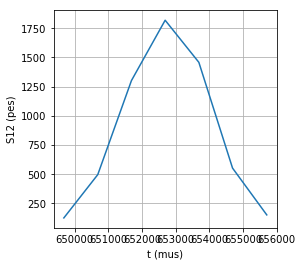

s2f = S12Features(tmin=649681.25, tmax=655702.56410256412, tpeak=652687.5, etot=5904.0743278849886, epeak=1819.0464772855908, width=6021.3141025641235) 
+++S1+++++
number of peaks = 1
S12 number = 0, samples = 7 sum in pes =9.029172133120799
time vector (mus) = [ 549.95   549.975  550.     550.025  550.05   550.075  550.1  ]
energy vector (pes) = [ 0.79413851  1.59442488  2.14860128  1.88534027  1.22456531  0.69365962
  0.68844227]
s1f = S12Features(tmin=549950.0, tmax=550100.0, tpeak=550000.0, etot=9.0291721331207988, epeak=2.1486012793157121, width=150.0) 
dt = 102.6875 mus


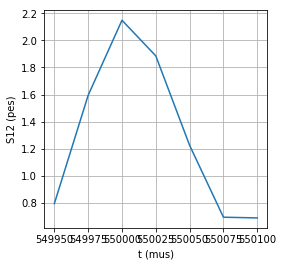

In [46]:
pmp(epm,event=3)

S1 has large er which may be distinctive of ER

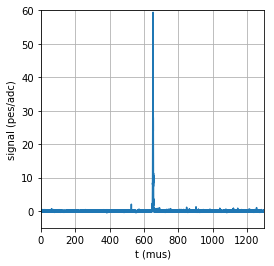

+++S2+++++
number of peaks = 1
S12 number = 0, samples = 9 sum in pes =6396.546483613141
time vector (mus) = [ 649.175   650.1875  651.1875  652.1875  653.1875  654.1875  655.1875
  656.1975  657.025 ]
energy vector (pes) = [  102.61213846   355.35916069   973.41816035  1638.03791279  1760.12440897
  1004.69782556   436.84906732   113.93539943    11.51241004]


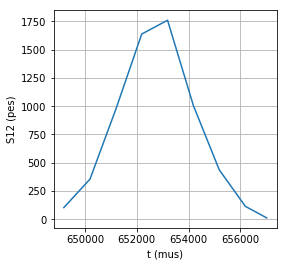

s2f = S12Features(tmin=649175.0, tmax=657025.0, tpeak=653187.5, etot=6396.5464836131414, epeak=1760.1244089716108, width=7850.0) 
+++S1+++++
number of peaks = 1
S12 number = 0, samples = 6 sum in pes =8.57810779057384
time vector (mus) = [ 526.45   526.475  526.5    526.525  526.55   526.575]
energy vector (pes) = [ 0.97608253  1.25054792  2.0015297   1.97308892  1.36213136  1.01472736]
s1f = S12Features(tmin=526450.0, tmax=526575.0, tpeak=526500.0, etot=8.5781077905738403, epeak=2.0015297038684072, width=125.0) 
dt = 126.6875 mus


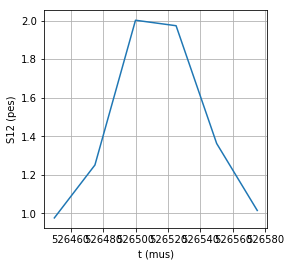

In [47]:
pmp(epm,event=4)

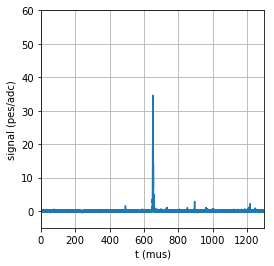

+++S2+++++
number of peaks = 1
S12 number = 0, samples = 9 sum in pes =4470.354191574498
time vector (mus) = [ 648.59875     649.7125      650.7125      651.7125      652.7125
  653.7125      654.7125      655.719375    656.80606061]
energy vector (pes) = [   73.04784967   204.63763415   633.11921458  1006.91769553  1114.18964187
   801.08934276   407.87403108   159.71401432    69.76476762]


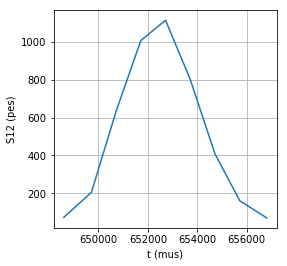

s2f = S12Features(tmin=648598.75, tmax=656806.06060606055, tpeak=652712.5, etot=4470.3541915744981, epeak=1114.1896418699762, width=8207.3106060605496) 
+++S1+++++
number of peaks = 1
S12 number = 0, samples = 10 sum in pes =9.487766359965406
time vector (mus) = [ 492.125  492.15   492.175  492.2    492.225  492.25   492.35   492.375
  492.4    492.425]
energy vector (pes) = [ 0.95258665  1.27021607  1.3335397   1.1432868   0.88521082  0.9096625
  0.61561285  0.88549707  0.83829167  0.65386224]
s1f = S12Features(tmin=492125.0, tmax=492425.0, tpeak=492175.0, etot=9.4877663599654056, epeak=1.3335396996715132, width=300.0) 
dt = 160.5375 mus


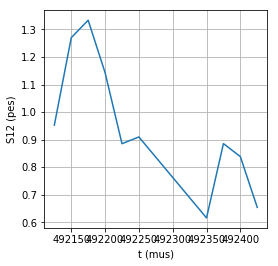

In [48]:
pmp(epm,event=5)

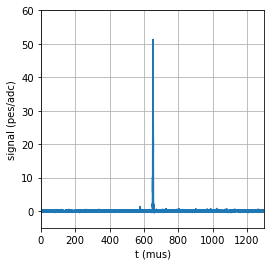

+++S2+++++
number of peaks = 1
S12 number = 0, samples = 7 sum in pes =6047.124932392124
time vector (mus) = [ 649.53125     650.5375      651.5375      652.5375      653.5375
  654.5375      655.61081081]
energy vector (pes) = [  134.36454093   486.05798834  1497.61647422  1886.40026467  1305.3508432
   605.61049263   131.72432839]


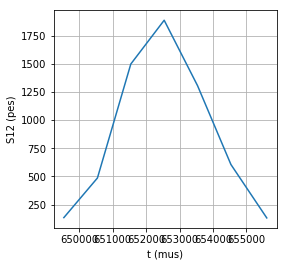

s2f = S12Features(tmin=649531.25, tmax=655610.81081081077, tpeak=652537.5, etot=6047.1249323921238, epeak=1886.4002646746189, width=6079.5608108107699) 
+++S1+++++
number of peaks = 0
S1 == 0


0

In [49]:
pmp(epm,event=6)

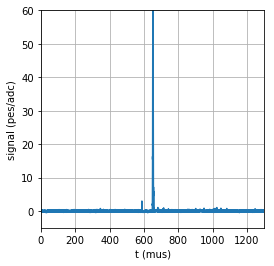

+++S2+++++
number of peaks = 1
S12 number = 0, samples = 7 sum in pes =8999.4304222288
time vector (mus) = [ 649.399375    650.4125      651.4125      652.4125      653.4125
  654.4125      655.38918919]
energy vector (pes) = [  158.34397876   854.25207592  2253.44505926  2827.02284057  1910.63786311
   817.69033859   178.03826601]


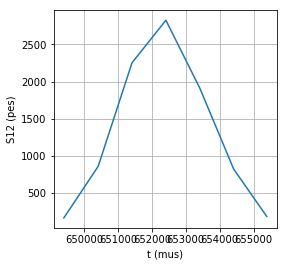

s2f = S12Features(tmin=649399.375, tmax=655389.18918918923, tpeak=652412.5, etot=8999.4304222287992, epeak=2827.0228405682578, width=5989.8141891892301) 
+++S1+++++
number of peaks = 1
S12 number = 0, samples = 8 sum in pes =13.514516570259069
time vector (mus) = [ 587.825  587.85   587.875  587.9    587.925  587.95   587.975  588.   ]
energy vector (pes) = [ 0.8718545   1.99386409  2.83970663  2.95072889  2.32241482  1.52392851
  0.50560587  0.50641326]
s1f = S12Features(tmin=587825.0, tmax=588000.0, tpeak=587900.0, etot=13.514516570259069, epeak=2.9507288909671172, width=175.0) 
dt = 64.5125 mus


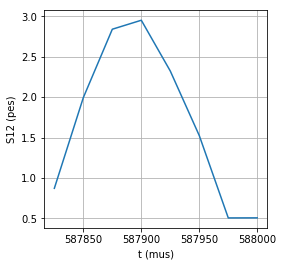

In [50]:
pmp(epm,event=8)

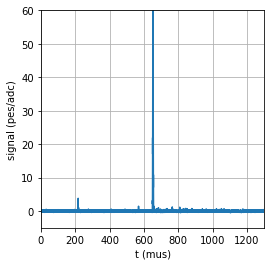

+++S2+++++
number of peaks = 1
S12 number = 0, samples = 7 sum in pes =7107.523864002991
time vector (mus) = [ 649.4875      650.4875      651.4875      652.4875      653.4875
  654.4875      655.53648649]
energy vector (pes) = [  118.10303415   713.21562827  1802.25616752  2366.13634127  1440.10561228
   547.5994401    120.10764042]


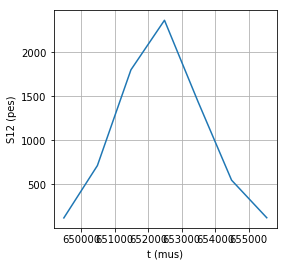

s2f = S12Features(tmin=649487.5, tmax=655536.48648648651, tpeak=652487.5, etot=7107.5238640029911, epeak=2366.136341272866, width=6048.9864864865085) 
+++S1+++++
number of peaks = 1
S12 number = 0, samples = 6 sum in pes =15.372053912140041
time vector (mus) = [ 216.9    216.925  216.95   216.975  217.     217.025]
energy vector (pes) = [ 1.45834054  3.11860104  4.02788655  3.61979037  2.2690211   0.87841431]
s1f = S12Features(tmin=216900.0, tmax=217025.0, tpeak=216950.0, etot=15.372053912140041, epeak=4.027886554431217, width=125.0) 
dt = 435.5375 mus


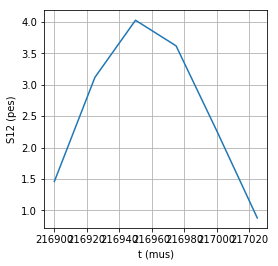

In [51]:
pmp(epm,event=9)